I will try mobilenet V2 with properpreprossing , the way i tried it for Resnet50,
* there will be no Preprocing at all 

Lets see and try the outcome 

In [1]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D

#imported preproceed mobilenetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input,decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 


from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf 

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np

In [5]:
a = tf.constant([1, 2, 3])
print(a.device)  # /job:localhost/replica:0/task:0/device:CPU:0

/job:localhost/replica:0/task:0/device:GPU:0


In [6]:
img_height, img_width = (224,224)
batch_size = 32 

train_data_dir = r"F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\train"
valid_data_dir =  r"F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\val"
test_data_dir = r"F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\test"

In [9]:

train_generator =ImageDataGenerator(
    preprocessing_function=preprocess_input, 
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True).flow_from_directory(
    directory=train_data_dir, 
    target_size=(224,224),
    batch_size=batch_size)

valid_generator =ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=valid_data_dir,
    target_size=(224,224),
    batch_size=batch_size)

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=test_data_dir, 
    target_size=(224,224), 
    batch_size=1, 
    shuffle=False)


Found 8605 images belonging to 9 classes.
Found 1841 images belonging to 9 classes.
Found 1854 images belonging to 9 classes.


In [5]:
x,y = test_generator.next()
x.shape

x,y = train_generator.next()
x.shape

(32, 224, 224, 3)

In [6]:
base_model = MobileNetV2(include_top=False, weights= "imagenet",input_shape= (224, 224, 3) )

In [7]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(train_generator.num_classes, activation='softmax' )(x) 
model = Model(inputs= base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.0001), loss="categorical_crossentropy", metrics = ['accuracy'])

In [8]:
history = model.fit(train_generator,epochs = 20 ,validation_data = valid_generator,verbose =1)

Epoch 1/20
269/269 [==============================] - 272s 980ms/step - loss: 0.6757 - accuracy: 0.8296 - val_loss: 0.2897 - val_accuracy: 0.9468
Epoch 2/20
269/269 [==============================] - 262s 973ms/step - loss: 0.1814 - accuracy: 0.9655 - val_loss: 0.2230 - val_accuracy: 0.9430
Epoch 3/20
269/269 [==============================] - 260s 966ms/step - loss: 0.1062 - accuracy: 0.9797 - val_loss: 0.1887 - val_accuracy: 0.9435
Epoch 4/20
269/269 [==============================] - 261s 969ms/step - loss: 0.0737 - accuracy: 0.9877 - val_loss: 0.1149 - val_accuracy: 0.9701
Epoch 5/20
269/269 [==============================] - 261s 969ms/step - loss: 0.0530 - accuracy: 0.9919 - val_loss: 0.1234 - val_accuracy: 0.9625
Epoch 6/20
269/269 [==============================] - 260s 968ms/step - loss: 0.0459 - accuracy: 0.9914 - val_loss: 0.1079 - val_accuracy: 0.9647
Epoch 7/20
269/269 [==============================] - 261s 971ms/step - loss: 0.0392 - accuracy: 0.9922 - val_loss: 0.1165 -

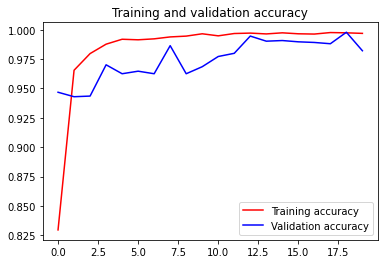

<Figure size 432x288 with 0 Axes>

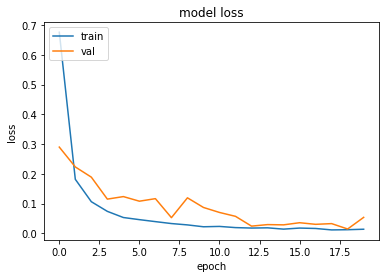

In [9]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
model.save(r"F:\Study\PGDAIML\Project-10\phase-5\MobileNet\savedModels\mobileNetv2-model-2-Date-11-02-22_Acc-98-batch-32-dataset-70-15-15.h5")

C:\Users\Arnab\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [25]:
test_loss, test_acc = model.evaluate(test_generator,verbose=2)

1854/1854 - 45s - loss: 0.0578 - accuracy: 0.9800 - 45s/epoch - 24ms/step


Load Model 

In [8]:
reconstructed_model = tf.keras.models.load_model(r"F:\Study\PGDAIML\Project-10\phase-5\MobileNet\savedModels\mobileNetv2-model-2-Date-11-02-22_Acc-98-batch-32-dataset-70-15-15.h5")
test_loss, test_acc = reconstructed_model.evaluate(test_generator,verbose=2)

1854/1854 - 50s - loss: 0.0578 - accuracy: 0.9800 - 50s/epoch - 27ms/step


Done Eval


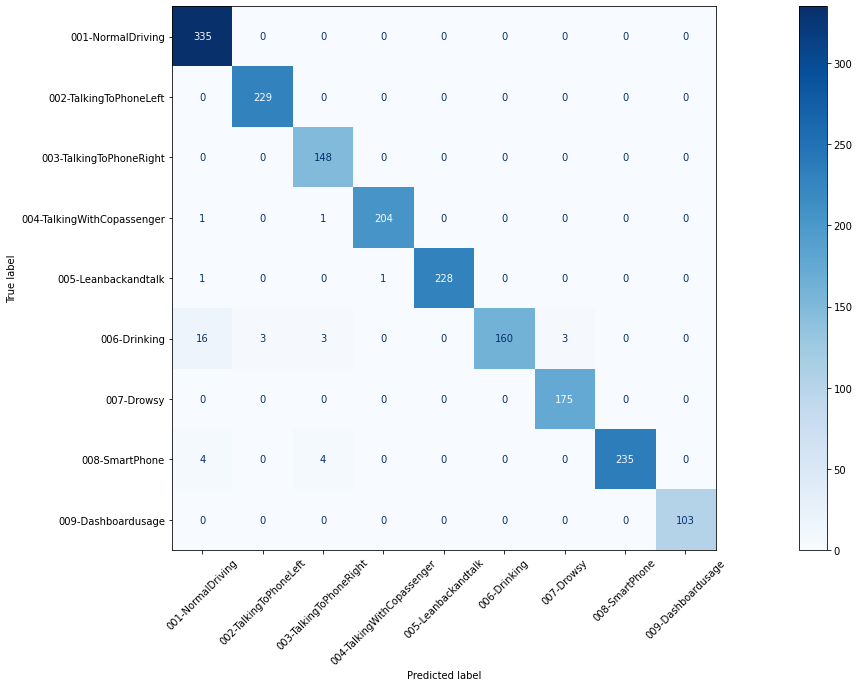

<Figure size 2160x720 with 0 Axes>

In [26]:
import pandas as pd
import seaborn as sn
import tensorflow as tf

filenames= test_generator.filenames
nb_samples = len(test_generator)

y_prob=[]

y_act=[]

test_generator.reset()

for _ in range(nb_samples):

    X_test,Y_test = test_generator.next() 
    y_prob.append(model.predict(X_test)) 
    y_act.append(Y_test)

print("Done Eval")

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob] 

actual_class= [list (train_generator.class_indices.keys())[i.argmax()] for i in y_act]


cm = confusion_matrix(actual_class, predicted_class)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list (test_generator.class_indices))


plt.rcParams["figure.figsize"] = (30, 10)

disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.show()
plt.tight_layout()

Error Analysis

In [27]:
paths = test_generator.filepaths


print(len(paths))
print(len(predicted_class))

for i in range(len(predicted_class)):
    if predicted_class[i] !=  actual_class[i]:
        print(paths[i])


1854
1854
F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\test\004-TalkingWithCopassenger\3-arnab 001.jpg
F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\test\004-TalkingWithCopassenger\3-arnab 215.jpg
F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\test\005-Leanbackandtalk\1 482.jpg
F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\test\005-Leanbackandtalk\2-arnab 439.jpg
F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\test\006-Drinking\1 152.jpg
F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\test\006-Drinking\1 157.jpg
F:\Study\PGDAIML\Project-10\Latest_data_set\Processed_data\Processed_data_from_colorLite_dataset-70-15-15\test\006-Drinking\1 